In [1]:
from multi_depots import *
%load_ext autoreload
%autoreload 2


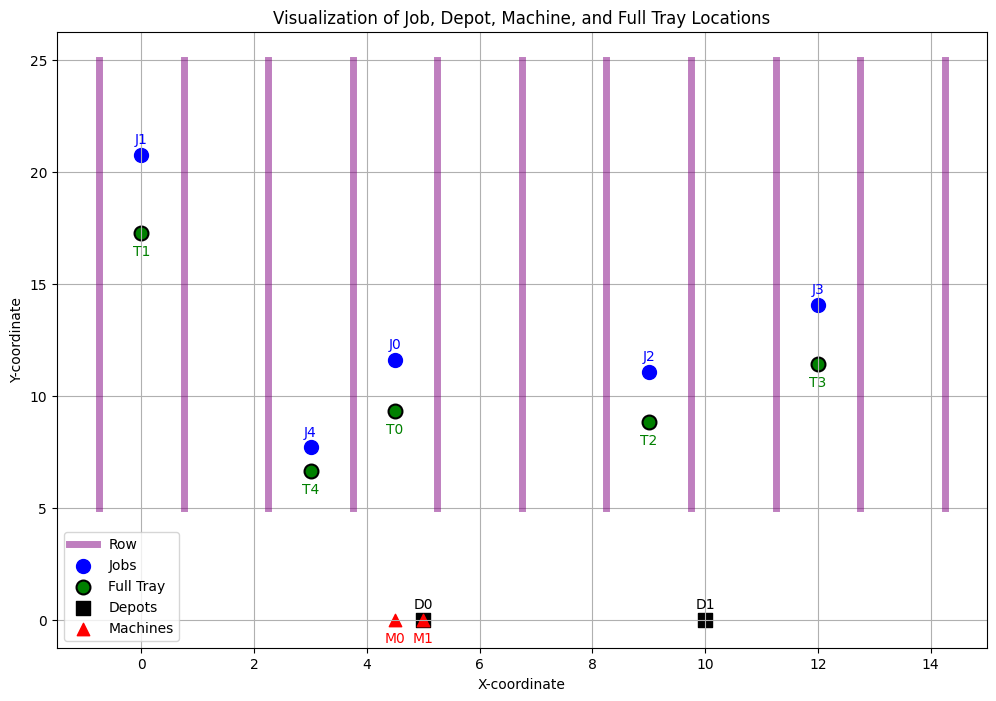

In [2]:
# Example Usage
num_jobs = 5
num_machines = 2
num_depots = 2
num_rows = 10
picker_speed = 0.2

(job_locations, release_times, depots, 
 machine_availables, machine_depots) = randomize_settings(num_jobs, num_machines, num_depots, 
                                                          num_rows=10, row_width=1.5, row_length=25, 
                                                          seed=1,machine_available_range=20, job_release_range=20, 
                                                          headland_space=5, picker_speed=0.5)

# Visualize settings
visualize_settings_with_full_tray_locations(job_locations, depots, release_times, machine_depots, picker_speed=picker_speed, 
                                            num_rows=num_rows, row_width=1.5, row_length=25, headland_space=5)


In [3]:
result = solve_scheduling_model(job_locations, release_times, depots, 
                               machine_availables, machine_depots, gantt_plot=True)
plt.show()


Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-27
Set parameter Heuristics to value 0.707
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: 13th Gen Intel(R) Core(TM) i7-13700F, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 337 rows, 155 columns and 1378 nonzeros
Model fingerprint: 0x8c460442
Variable types: 0 continuous, 155 integer (126 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+05]
Found heuristic solution: objective 286.0000000
Presolve removed 76 rows and 50 columns
Presolve time: 0.00s
Presolved: 261 rows, 105 columns, 1248 nonzeros
Variable types: 0 continuous, 105 integer (84 binary)
Found heuristic solution: objective 285.0000000

Root relaxation: objective 1.700000e+01, 59 iterations, 0.

In [4]:
model = result["model"]
E = result["E"]
v = result["v"]
s = result["s"]
process_times = result["P"]
machines = result["machines"]
jobs = result["jobs"]
depots = result["depots"]
T = result["T"]
release_times = result["release_times"]
process_times = result["process_times"]

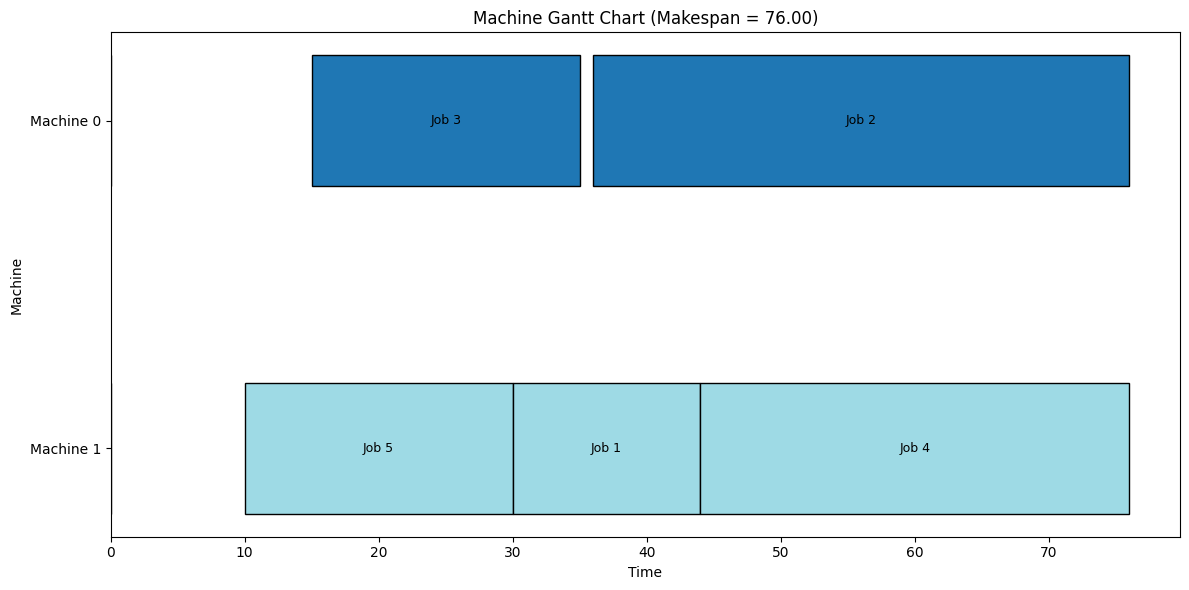

In [5]:
plot_machine_gantt(model, E, v, s, process_times, machines, jobs, depots, num_jobs, T)

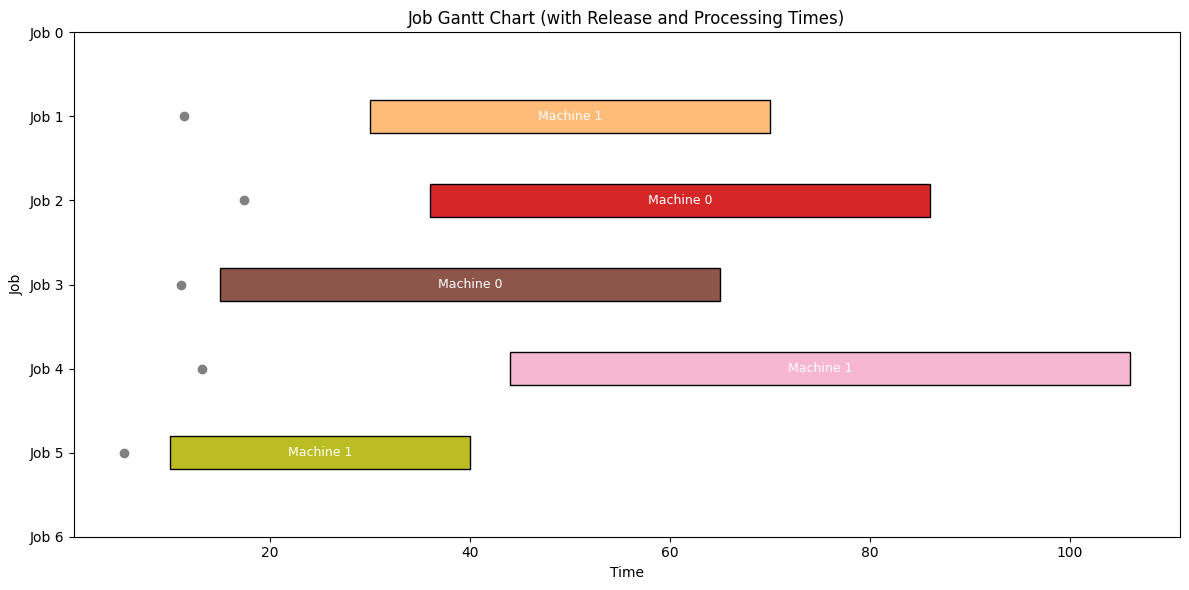

In [8]:
plot_job_gantt(
                model=model,
                v=v,
                s=s,
                jobs=jobs,
                depots=depots,
                release_times=release_times,
                process_times={j: process_times[j, :, :].max() for j in range(len(jobs))},
                machine_availables=machine_availables,
                moving_speed=picker_speed
            )